# Regression to predict Dengue Cases in Brazil

### We explored neural networks to do a regression task and try to predict the dengue spread in Brazil.

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12345)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import save_model

### Let's load the data set

In [5]:
df = pd.read_csv("../Dados/Datasets/Belo Horizonte.csv.gz")

In [3]:
df

,capital,data_alvo,ocorrencias_alvo,por_habitante_alvo,municipio,dt_sintoma,lag,ocorrencias,por_habitante,distancia
0,Belo Horizonte,2019-05-05,1168,46.279053,Aracaju,2016-05-01,157.0,24,3.772523,12.48
1,Belo Horizonte,2019-05-05,1168,46.279053,Aracaju,2016-05-08,156.0,40,6.286037,12.48
2,Belo Horizonte,2019-05-05,1168,46.279053,Aracaju,2016-05-15,155.0,21,3.299381,12.48
3,Belo Horizonte,2019-05-05,1168,46.279053,Aracaju,2016-05-22,154.0,35,5.497664,12.48
4,Belo Horizonte,2019-05-05,1168,46.279053,Aracaju,2016-05-29,153.0,31,4.868197,12.48
...,...,...,...,...,...,...,...,...,...,...
1106373,Belo Horizonte,2019-04-28,5683,225.203180,Vitória,2019-03-24,5.0,146,40.212963,3.78
1106374,Belo Horizonte,2019-04-28,5683,225.203180,Vitória,2019-03-31,4.0,204,56.176217,3.78
1106375,Belo Horizonte,2019-04-28,5683,225.203180,Vitória,2019-04-07,3.0,196,53.962083,3.78
1106376,Belo Horizonte,2019-04-28,5683,225.203180,Vitória,2019-04-14,2.0,180,49.546648,3.78


#### We are going to split the data into train and test data sets. The columns we'll use are: por_habitante_alvo, 'lag, por_habitante and distancia

In [4]:
train_data = df[['por_habitante_alvo','por_habitante','lag','distancia']]
train_data

,por_habitante_alvo,por_habitante,lag,distancia
0,46.279053,3.772523,157.0,12.48
1,46.279053,6.286037,156.0,12.48
2,46.279053,3.299381,155.0,12.48
3,46.279053,5.497664,154.0,12.48
4,46.279053,4.868197,153.0,12.48
...,...,...,...,...
1106373,225.203180,40.212963,5.0,3.78
1106374,225.203180,56.176217,4.0,3.78
1106375,225.203180,53.962083,3.0,3.78
1106376,225.203180,49.546648,2.0,3.78


In [31]:
train_dataset = df[df['data_alvo']<='2017'][['por_habitante_alvo','por_habitante','lag','distancia']]
test_dataset = df[df['data_alvo']>'2017'][['por_habitante_alvo','por_habitante','lag','distancia']]
train_dataset.head()

,por_habitante_alvo,por_habitante,lag,distancia
4238,14.820225,11.646867,157.0,12.48
4239,14.820225,16.536763,156.0,12.48
4240,14.820225,13.663898,155.0,12.48
4241,14.820225,15.008761,154.0,12.48
4242,14.820225,16.184203,153.0,12.48


### We are going to normalize the input.

In [32]:
train_stats = train_data.describe()
train_stats.pop('por_habitante_alvo')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
por_habitante,1106378.0,15.949661,41.611200,0.0,1.890014,4.716662,13.243189,711.541423
lag,1106378.0,79.000071,45.321057,1.0,40.000000,79.000000,118.000000,157.000000
distancia,1106378.0,14.451103,7.846408,0.0,8.200000,13.720000,19.320000,31.170000


In [33]:
train_labels = train_dataset.pop('por_habitante_alvo')
test_labels = test_dataset.pop('por_habitante_alvo')

In [34]:
train_labels.head()

4238    14.820225
4239    14.820225
4240    14.820225
4241    14.820225
4242    14.820225
Name: por_habitante_alvo, dtype: float64

In [35]:
test_labels.head()

0    46.279053
1    46.279053
2    46.279053
3    46.279053
4    46.279053
Name: por_habitante_alvo, dtype: float64

In [36]:
#Given a dataset, normalize it.
def norm(x):
    return (x - (train_stats['mean'])) / (train_stats['std'])
            
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [37]:
normed_train_data.head()

,por_habitante,lag,distancia
4238,-0.103405,1.721053,-0.251211
4239,0.014109,1.698988,-0.251211
4240,-0.054931,1.676923,-0.251211
4241,-0.022612,1.654858,-0.251211
4242,0.005637,1.632794,-0.251211


In [38]:
normed_test_data.head()

,por_habitante,lag,distancia
0,-0.292641,1.721053,-0.251211
1,-0.232236,1.698988,-0.251211
2,-0.304011,1.676923,-0.251211
3,-0.251182,1.654858,-0.251211
4,-0.266310,1.632794,-0.251211


## Let's build the model. We are going to use a neural Dense network with 1 hidden layer.

In [13]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]), 
    layers.Dense(64, activation=tf.nn.relu),     
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return(model)

In [39]:
model = build_model()

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


## Let's have an example output

In [41]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.14863242],
       [0.13380994],
       [0.14032592],
       [0.1351498 ],
       [0.13044335],
       [0.1396994 ],
       [0.14249991],
       [0.1372956 ],
       [0.12774022],
       [0.12715587]], dtype=float32)

## We are going to train the model with an early stopping function, to avoid overfitting.

In [42]:
EPOCHS = 40
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,
  callbacks=[early_stop])


Train on 467985 samples, validate on 116997 samples
Epoch 1/40
467985/467985 [==============================] - 37s 78us/sample - loss: 23096.3823 - mean_absolute_error: 101.2123 - mean_squared_error: 23096.3379 - val_loss: 5585.8579 - val_mean_absolute_error: 74.3230 - val_mean_squared_error: 5585.8516
Epoch 2/40
467985/467985 [==============================] - 35s 76us/sample - loss: 22920.4070 - mean_absolute_error: 101.4007 - mean_squared_error: 22920.4199 - val_loss: 5059.8628 - val_mean_absolute_error: 70.0665 - val_mean_squared_error: 5059.8633
Epoch 3/40
467985/467985 [==============================] - 35s 75us/sample - loss: 22865.6212 - mean_absolute_error: 101.2452 - mean_squared_error: 22865.5352 - val_loss: 4851.9892 - val_mean_absolute_error: 68.2178 - val_mean_squared_error: 4851.9858
Epoch 4/40
467985/467985 [==============================] - 35s 76us/sample - loss: 22817.0725 - mean_absolute_error: 101.1239 - mean_squared_error: 22817.0898 - val_loss: 6169.0813 - val_m

In [48]:
model.save('NeuralModel.h5')

#### For some reason, the loss functions achieved extremely high values and did not improve with the batches. This is probably a regression model is not adequate for this situation, and also de data set has several repeated values.

## Plotting the results, we obtain

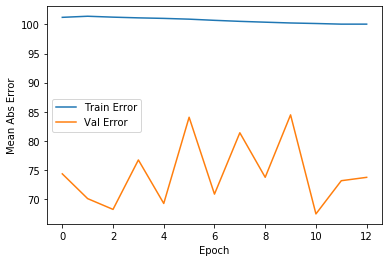

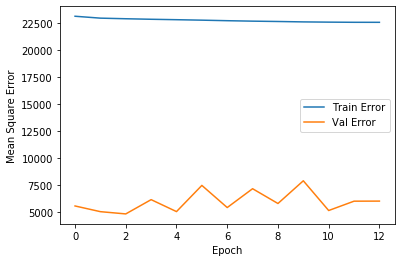

In [105]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    #plt.ylim([0.4,0.6])
    plt.legend()
    plt.savefig('history1.png')

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    #plt.ylim([0.9,1.1])
    plt.legend()
    plt.savefig('history2.png')
    plt.show()


plot_history(history)


In [44]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} por_habitante".format(mae))
print("Testing set Mean Sqr Error: {:5.2f} por_habitante".format(mse))

Testing set Mean Abs Error: 72.75 por_habitante
Testing set Mean Sqr Error: 6441.37 por_habitante


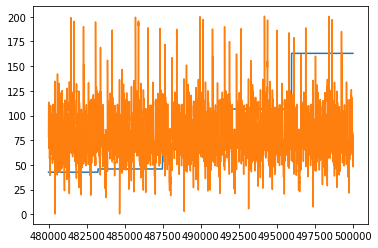

In [106]:
test_predictions = model.predict(normed_test_data).flatten()
test = test_labels.reset_index(drop=True)
predictions = pd.DataFrame(test_predictions)
plt.plot(test[480000:500000])
plt.plot(predictions[480000:500000])
